### Q7.csv file solution

In [42]:
import pandas as pd

data_Q7 = pd.read_csv('Q7.csv')

In [43]:
data_Q7.head()

,Unnamed: 0,Points,Score,Weigh
0,Mazda RX4,3.90,2.620,16.46
1,Mazda RX4 Wag,3.90,2.875,17.02
2,Datsun 710,3.85,2.320,18.61
3,Hornet 4 Drive,3.08,3.215,19.44
4,Hornet Sportabout,3.15,3.440,17.02


In [44]:
data_Q7.describe()

,Points,Score,Weigh
count,32.000000,32.000000,32.000000
mean,3.596563,3.217250,17.848750
std,0.534679,0.978457,1.786943
min,2.760000,1.513000,14.500000
25%,3.080000,2.581250,16.892500
50%,3.695000,3.325000,17.710000
75%,3.920000,3.610000,18.900000
max,4.930000,5.424000,22.900000


### Q9_a.csv 

In [14]:
data_q9 = pd.read_csv('Q9_a.csv', index_col = 0)

In [15]:
data_q9.head()

,speed,dist
Index,,
1,4,2
2,4,10
3,7,4
4,7,22
5,8,16


In [20]:
from scipy import stats as st
import numpy as np
print('Skewness of speed: ',np.round(st.skew(data_q9['speed'], bias=False),2))
print('Skewness of distance' ,np.round(st.skew(data_q9['dist'], bias=False),2))
print('Kurtosis of speed: ',np.round(st.kurtosis(data_q9['speed'], bias=False),2))
print('Kurtosis of distance' ,np.round(st.kurtosis(data_q9['dist'], bias=False),2))

Skewness of speed:  -0.12
Skewness of distance 0.81
Kurtosis of speed:  -0.51
Kurtosis of distance 0.41


### Q9_b.csv

In [6]:
data_q9_b = pd.read_csv('Q9_b.csv', index_col = 0)

In [7]:
data_q9_b.head()

,SP,WT
1,104.185353,28.762059
2,105.461264,30.466833
3,105.461264,30.193597
4,113.461264,30.632114
5,104.461264,29.889149


In [8]:
from scipy import stats as st
import numpy as np
print('Skewness of SP: ',np.round(st.skew(data_q9_b['SP'], bias=False),2))
print('Skewness of WT' ,np.round(st.skew(data_q9_b['WT'], bias=False),2))
print('Kurtosis of SP: ',np.round(st.kurtosis(data_q9_b['SP'], bias=False),2))
print('Kurtosis of WT' ,np.round(st.kurtosis(data_q9_b['WT'], bias=False),2))

Skewness of SP:  1.61
Skewness of WT -0.61
Kurtosis of SP:  2.98
Kurtosis of WT 0.95


### Q11 | By using scipy.stats library

In [25]:
from scipy import stats
sample_mean = 200
sample_sd = 30 
print('Confidence Interval for 94% confidence: ', np.round(stats.norm.interval(.94, sample_mean, sample_sd/np.sqrt(2000)),2))
print('Confidence Interval for 96% confidence: ', np.round(stats.norm.interval(.96, sample_mean, sample_sd/np.sqrt(2000)),2))
print('Confidence Interval for 98% confidence: ', np.round(stats.norm.interval(.98, sample_mean, sample_sd/np.sqrt(2000)),2))

Confidence Interval for 94% confidence:  [198.74 201.26]
Confidence Interval for 96% confidence:  [198.62 201.38]
Confidence Interval for 98% confidence:  [198.44 201.56]


### Q11 | By using CI Formula

In [39]:
# Confidence Level = 94%
# significance level (alpha) = 1-.94 = .06 (Area in both the tails)
# area in one tail (alpha/2) = .03
# Since z-table and norm.ppf/norm.cdf gives the area to the left of the curve
# to calculate critical score (z-score), we use point function ppf and hence will pass the area to the left which is (1-.03) = .97

def CI(mean, deviation, sample_count, conf_lev):
    alpha_1tail = (1-(conf_lev/100))/2
    left_area = 1-alpha_1tail
    z = np.round(stats.norm.ppf(left_area),2)
    print('z-value: ',z)
    print('Cross-checked this value from z-table as well')
    error = sample_sd/np.sqrt(2000)
    CI_range = [np.round(sample_mean-z*error,2), np.round(sample_mean+z*error,2)]
    return CI_range
    
CI_arr = [94,96,98]
sample_mean = 200
sample_sd = 30 
sample_count = 2000
for i in CI_arr:
    CIrange = CI(sample_mean, sample_sd, sample_count, i)
    print(f'CI for {i}%: ', CIrange)


z-value:  1.88
Cross-checked this value from z-table as well
CI for 94%:  [198.74, 201.26]
z-value:  2.05
Cross-checked this value from z-table as well
CI for 96%:  [198.62, 201.38]
z-value:  2.33
Cross-checked this value from z-table as well
CI for 98%:  [198.44, 201.56]


### Q20 | Cars.csv

In [45]:
data_cars = pd.read_csv('D:\Shubhi\DataScience\ExcelR\Assignments\Basic Stastistics_Level1\Cars.csv')

In [46]:
data_cars.head()

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149


In [47]:
data_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   HP      81 non-null     int64  
 1   MPG     81 non-null     float64
 2   VOL     81 non-null     int64  
 3   SP      81 non-null     float64
 4   WT      81 non-null     float64
dtypes: float64(3), int64(2)
memory usage: 3.3 KB


In [59]:
mean = np.round(data_cars['MPG'].mean(),2)
std = np.round(data_cars['MPG'].std(),2)
print('Probability of cars having MPG > 38: ', np.round(1- stats.norm.cdf(38, mean, std),2))
print('Probability of cars having MPG < 40: ', np.round(stats.norm.cdf(40, mean, std),2))
print('Probability of cars having 20 < MPG < 50: ', np.round(stats.norm.cdf(50, mean, std) - stats.norm.cdf(20, mean, std),2))

Probability of cars having MPG > 38:  0.35
Probability of cars having MPG < 40:  0.73
Probability of cars having 20 < MPG < 50:  0.9


C:\Users\Ridaan\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='MPG'>

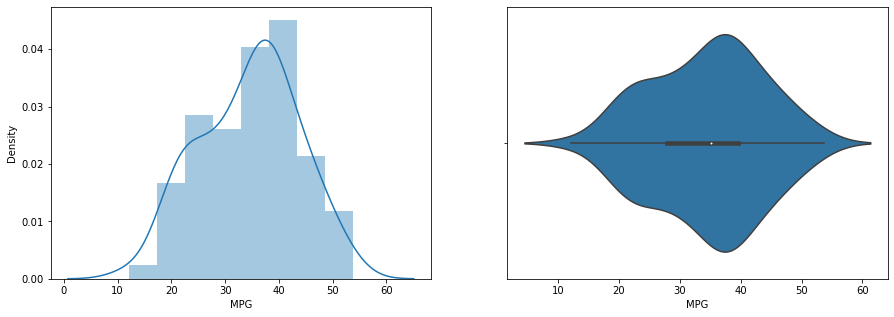

In [74]:
# to visualize the probability through distribution plot
import seaborn as sns
import matplotlib.pyplot as plt

fig,axes=plt.subplots(nrows=1,ncols=2, figsize=(15,5))

# distplot and violin plot
sns.distplot(data_cars['MPG'], ax=axes[0] )
sns.violinplot(x='MPG', data=data_cars, ax=axes[1])



### Q21 a)

<AxesSubplot:xlabel='MPG'>

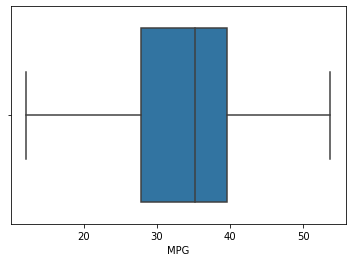

In [76]:
sns.boxplot(x='MPG', data=data_cars)


In [79]:
data_cars['MPG'].describe()

count    81.000000
mean     34.422076
std       9.131445
min      12.101263
25%      27.856252
50%      35.152727
75%      39.531633
max      53.700681
Name: MPG, dtype: float64

In [83]:
print('Kurtosis: ', np.round(data_cars['MPG'].kurt(),2))

Kurtosis:  -0.61


In [82]:
print('Skewness:', np.round(data_cars['MPG'].skew(),2))

Skewness: -0.18


### Q21 b)

In [85]:
wc_at = pd.read_csv('D:\Shubhi\DataScience\ExcelR\Assignments\Basic Stastistics_Level1\wc-at.csv')

In [86]:
wc_at.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109 entries, 0 to 108
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Waist   109 non-null    float64
 1   AT      109 non-null    float64
dtypes: float64(2)
memory usage: 1.8 KB


In [87]:
wc_at.describe()

,Waist,AT
count,109.000000,109.000000
mean,91.901835,101.894037
std,13.559116,57.294763
min,63.500000,11.440000
25%,80.000000,50.880000
50%,90.800000,96.540000
75%,104.000000,137.000000
max,121.000000,253.000000


C:\Users\Ridaan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Ridaan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='AT'>

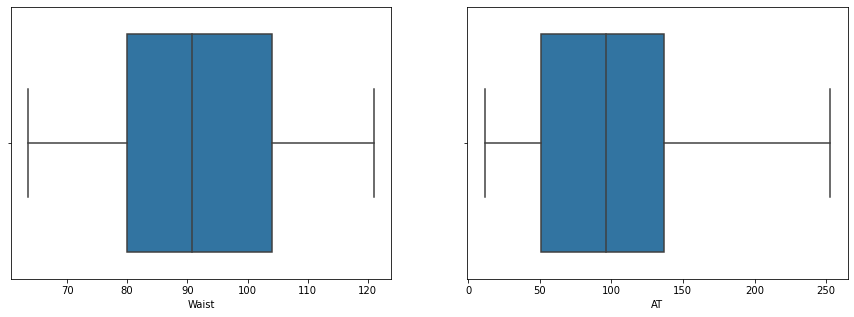

In [88]:
fig1,axes=plt.subplots(nrows=1,ncols=2, figsize=(15,5))

sns.boxplot(wc_at['Waist'], ax=axes[0])
sns.boxplot(wc_at['AT'], ax=axes[1])

### Q22) Z-scores 

In [94]:
def z_score(conf):
    alpha = 1-conf/100
    area_1tail = alpha/2
    area_left = 1-area_1tail
    print('area to look in z-table: ', area_left)
    return np.round(stats.norm.ppf(area_left),2)

print('Z-score for 90% CI: ', z_score(90))
print('Z-score for 94% CI: ', z_score(94))
print('Z-score for 60% CI: ', z_score(60))

area to look in z-table:  0.95
Z-score for 90% CI:  1.64
area to look in z-table:  0.97
Z-score for 94% CI:  1.88
area to look in z-table:  0.8
Z-score for 60% CI:  0.84


In [95]:
def t_score(conf):
    df = 25-1
    alpha = 1-conf/100 #2-tail
    area_1tail = alpha/2 #1-tail
    area_left = 1-area_1tail #cum-probability
    # refer | https://www.sjsu.edu/faculty/gerstman/StatPrimer/t-table.pdf
    print('area to look in z-table: ', area_left)
    return np.round(stats.t.ppf(area_left,df),2)

# all three values are also validated through online t-value calculator
# https://goodcalculators.com/student-t-value-calculator/
print('t-score for 95% CI: ', t_score(95)) # this is verified in above t-table reference table
print('t-score for 96% CI: ', t_score(96))
print('t-score for 99% CI: ', t_score(99)) # this is also verified in t-table

area to look in z-table:  0.975
t-score for 95% CI:  2.06
area to look in z-table:  0.98
t-score for 96% CI:  2.17
area to look in z-table:  0.995
t-score for 99% CI:  2.8


### Q24 | probability of bulbs

In [102]:
t = np.round((260-270)/(90/np.sqrt(18)),2)
print(t)

-0.47


In [105]:
print('probability that mean is less than 260 days: ', np.round(stats.t.cdf(t, 17),2))

probability that mean is less than 260 days:  0.32
